<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#загрузка-данных,-просмотр" data-toc-modified-id="загрузка-данных,-просмотр-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>загрузка данных, просмотр</a></span></li><li><span><a href="#подготовка-данных-к-обучению" data-toc-modified-id="подготовка-данных-к-обучению-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>подготовка данных к обучению</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#DecissionTreeClassifier" data-toc-modified-id="DecissionTreeClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>DecissionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>CatBoostClassifier</a></span></li><li><span><a href="#Таким-образом,-лучшие-показатели-f1-дала-модель-LogisticRegresion.-Попробуем-их-улучшить" data-toc-modified-id="Таким-образом,-лучшие-показатели-f1-дала-модель-LogisticRegresion.-Попробуем-их-улучшить-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Таким образом, лучшие показатели f1 дала модель LogisticRegresion. Попробуем их улучшить</a></span></li><li><span><a href="#Дообучим-выбранную-модель-на-всех-оставшихся-данных-перед-финальной-и-проведем-тест-на-тестовой-выборке." data-toc-modified-id="Дообучим-выбранную-модель-на-всех-оставшихся-данных-перед-финальной-и-проведем-тест-на-тестовой-выборке.-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Дообучим выбранную модель на всех оставшихся данных перед финальной и проведем тест на тестовой выборке.</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

### загрузка данных, просмотр

In [1]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.7 MB/s eta 0:00:00


In [2]:
import warnings
warnings.simplefilter("ignore")

import os
import io
import re
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer 

from catboost import CatBoostClassifier

import nltk
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
nltk.download('stopwords') 
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
try:
    data = pd.read_csv('/datasets/toxic_comments.csv')
    
except:
    from google.colab import files
    uploaded = files.upload()
    data = pd.read_csv(io.BytesIO(uploaded['toxic_comments.csv']))
    

Saving toxic_comments.csv to toxic_comments.csv


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Огонь, данные на месте:)</div>

In [8]:
print(data.info())
display(data.head())
print()
print(data.isnull().sum().sort_values(ascending=False).head(10))
data_original = data
print(data[data['toxic']==1].count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB
None


,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0



Unnamed: 0    0
text          0
toxic         0
dtype: int64
Unnamed: 0    16186
text          16186
toxic         16186
dtype: int64


для анализа и обучения предоставлены 159 тысяч текстов с оценкой их токсичности, 16 тысяч текстов токсичны. в данных нет пропусков, формат соответвует назначению.

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b>Данные также необходимо очистить от мусора и привести в начальную форму с помощью WordNetLemmatizer:
    
+  https://webdevblog.ru/podhody-lemmatizacii-s-primerami-v-python/
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> сделал лемматизацию через WordNet, убрал знаки препинания, мешок стал ощутимо меньше. Спасибо!

In [9]:
lemmatizer = WordNetLemmatizer()

def clear_text(text):
    t = re.sub(r'[^a-zA-Z ]', ' ', text) 
    t_list = t.split()
    t_text = ' '.join(t_list)
    return t_text
for i in data.index:
    data.loc[i, 'text'] = lemmatizer.lemmatize(clear_text(data.loc[i,'text']))
print(data['text'].head())

0    Explanation Why the edits made under my userna...
1    D aww He matches this background colour I m se...
2    Hey man I m really not trying to edit war It s...
3    More I can t make any real suggestions on impr...
4    You sir are my hero Any chance you remember wh...
Name: text, dtype: object


<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b>`
    
Так же можешь попробовать использовать spacy:
    
```python
import spacy
nlp = spacy.load('en_core_web_sm')

def lemmatize_spacy(text):
    return " ".join([token.lemma_ for token in nlp(text)])

data['lemm_spacy'] = data['text'].progress_apply(lemmatize_spacy)     
```

Вот так можно следить за выполнением функции (как раз выше его использовал)

```python
    
from tqdm import tqdm
tqdm.pandas()
data['text'] = data['text'].progress_apply(lemmatize_text) 
```
Где *lemmatize_text* - функция

    
P.S Кстати можно ускорить spacy ( раз в 5 +-)
    
```python
new_corpus = []

for doc in tqdm(nlp.pipe(data['text'], batch_size=64, n_process=-1, disable=["parser", "ner"]), total=len(data['text'])):
    word_list = [tok.lemma_ for tok in doc]
    new_corpus.append(' '.join(word_list))
    
data['lemm_spacy_new'] = new_corpus   
    
    
```
    
Для больших объемов текста ```SpaCy``` рекомендует использовать ```nlp.pipe```, который может работать в пакетах ```batch_size```(Допустим ```batch_size=64```, тогда все наши данные делятся на 64 пакета (как прям в фолдах, только там мы пишем число на сколько поделить наши данные (3/5/10 частей),а тут пишем, сколько данных отдать в обработку)  и имеет встроенную поддержку многопроцессорной обработки ```n_process``` (аналог ```n_jobs``` для GridSearchCV).

Кроме того, нужно убедиться, что мы отключили все элементы конвейера, которые мы не планируем использовать, поскольку они просто потратят время на обработку. Если мы выполняем только лемматизацию, то необходимо передать ```disable=["parser", "ner"]``` к ```nlp.pipe```.
    
    
P.S.S Если запустишь ```nlp.pipe```, то первое время нужно подождать прежде, чем начнется обработка 
</div>

### подготовка данных к обучению

In [10]:
#создадим валидационную и тестовую выборки, тренировочную уменьшим
rand = 12345
remaining, test = train_test_split(
    data, 
    test_size=0.20, 
    stratify = data['toxic'], 
    random_state = rand
)

leftovers, train = train_test_split(
    remaining, 
    test_size=0.4, 
    stratify = remaining['toxic'], 
    random_state = rand
)


x_train = train['text']
y_train = train['toxic']
x_test = test['text']
y_test = test['toxic']

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50974,)
(50974,)
(31859,)
(31859,)


<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> В дальнейшем используешь GridSearchCV, который основан на кросс валидации, поэтому использование валидации избыточно. Лучше соединить обучающую и валидационную выборку, так мы больше данных выучим, а значит лучше научимся обобщать их

+  https://neptune.ai/blog/cross-validation-in-machine-learning-how-to-do-it-right
+  https://academy.yandex.ru/handbook/ml/article/kross-validaciya

P.S С помощью `model.best_score_` можно узнать лучшую метрику у GridSearchCV
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> убрал валидационную выборку и все операции с ней, но не стал расширять тренировочную, чтобы не усложнять выбор модели. Она все будет частью "remaining", на которой будем проводить финальное обучение выбранной модели.</div>


<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b>Хорошо
</div>

In [35]:
corpus_train = x_train.values

count_vect = TfidfVectorizer(stop_words=nltk_stopwords.words('russian'))
bow_train = count_vect.fit_transform(corpus_train) 

print("Размер мешка с учётом стоп-слов:", bow_train.shape)
#print(bow_train[1])

Размер мешка с учётом стоп-слов: (50974, 86969)


<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Перевод в unicode актуально для русского языка, который был в тренажере, в данной задаче это делать нет необходимости

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Убрал, спасибо!

In [36]:
corpus_test = x_test.values

bow_test = count_vect.transform(corpus_test) 

print("Размер мешка с учётом стоп-слов:", bow_test.shape)

Размер мешка с учётом стоп-слов: (31859, 86969)


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Отлично, молодец, верно используешь Tfidf.
    
    
Совет: Внутри кросс-валидации происходит разбиение выборки на train и valid. Однако, в таком случае векторизатор обучен на всей выборке(train), а это не совсем корректно. Чтобы избежать это можно воспользоваться Pipeline:
    
```python
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stopwords)),
    ('logreg', LogisticRegression(random_state=42)),
])
parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'logreg__C': [1,2,6]
}

grid_search_tune = RandomizedSearchCV(pipeline, parameters, cv=3, n_jobs=-1, scoring='f1', verbose=3)
grid_search_tune.fit(train_features, train_targets)
  
    
```
    
Это просто каркас, можешь сам выбрать какие параметры использовать для подбора:) 
    
+  https://runebook.dev/ru/docs/scikit_learn/modules/generated/sklearn.model_selection.halvinggridsearchcv - тут про HalvingGridSearchCV
    
+  https://www.rupython.com/python-sklearn-pipeline-pipeline-28301.html - про pipeline
+  https://towardsdatascience.com/how-to-use-sklearn-pipelines-for-ridiculously-neat-code-a61ab66ca90d

</div>

## Обучение

### LogisticRegression

In [37]:
%%time
log_param = {
    'C': range(1, 11, 2),
    'solver': ['lbfgs', 'newton-cg', 'sag'],
    'class_weight': [None, 'balanced']
    }

grid = GridSearchCV(
                    LogisticRegression(class_weight = 'balanced'), 
                    param_grid = log_param, 
                    cv=5, 
                    scoring='f1'
                    )
grid.fit(bow_train, y_train)
print('Лучшая регрессия', grid.best_estimator_)
log = grid.best_estimator_
print('f1 регрессии', grid.best_score_)

Лучшая регрессия LogisticRegression(C=9, class_weight='balanced')
f1 регрессии 0.7647637101454015
CPU times: user 4min 52s, sys: 2min 57s, total: 7min 50s
Wall time: 5min 6s


Лучшая регрессия LogisticRegression(C=3)
f1 регрессии 0.7599278232887289
CPU times: user 10min 52s, sys: 6min 12s, total: 17min 4s
Wall time: 10min 46s

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Кросс валидации хватит вполне, чтобы оценить модель
    
    
Для LogisticRegression по подбирай параметр C (коэффициент регуляризации)

    
+  ```class_weight: [None, 'balanced']``` - да, у нас есть дисбаланс, но вдруг модель и без изменения весов получит лучше результат
+  ```C: range(1, 11, 2)``` - от 1 до 11 с шагом 2 это параметр регуляризации (должен помочь)
    
    
Для подбора лучше использовать `GridSearchCV` 
    
    
```python
param = { 'C': range(1, 11, 2), 'class_weight': [None, 'balanced'] }

model_lr = LogisticRegression()

# инициализируем GridSearchCV
cv_lr = GridSearchCV(estimator = model_lr, 
                           param_grid = param, 
                           cv = 3,
                           n_jobs = -1, 
                           verbose = 0, 
                           scoring = 'f1',
                          )
cv_lr.fit(tf_idf_train, target_train)    
```
</div>

уже хороший результат, проходим по метрикам, посмотрим другие модели

### DecissionTreeClassifier

%%time
#DecisionTreeClassifier

tree_param = {
            'max_depth':  range(1, 20),
            'min_samples_leaf': [5, 10, 20]
            #'min_samples_split': [5, 10, 20]
            }

grid = GridSearchCV(
                    DecisionTreeClassifier(random_state=rand, 
                                           class_weight = 'balanced'), 
                    param_grid = tree_param, 
                    cv=5, 
                    scoring='f1'
                    )
grid.fit(bow_train, y_train)
print('Лучшее дерево решений', grid.best_estimator_)
print('f1 дерева', grid.best_score_)

Лучшее дерево решений DecisionTreeClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=5, random_state=12345)
f1 дерева 0.48205525536058796
CPU times: user 13min 46s, sys: 163 ms, total: 13min 47s
Wall time: 13min 48s

tree = grid.best_estimator_
print('f1 дерева', grid.best_score_)

### RandomForestClassifier

%%time
#RandomForestClassifier

forest_param = {
    'max_depth': range(1, 20),
    'n_estimators': range(1, 20)
    }

grid = GridSearchCV(
                    RandomForestClassifier(random_state=rand,
                                          class_weight = 'balanced'), 
                    param_grid = forest_param, 
                    cv=5, 
                    scoring='f1'
                    )
grid.fit(bow_train, y_train)
print('Лучший лес', grid.best_estimator_)

forest = grid.best_estimator_
print('f1 леса', grid.best_score_)

Лучший лес RandomForestClassifier(class_weight='balanced', max_depth=19, n_estimators=19,
                       random_state=12345)
CPU times: user 20min 49s, sys: 603 ms, total: 20min 50s
Wall time: 20min *58s*
f1 леса 0.35281906544875064

### CatBoostClassifier

%%time

# CatBoostClassifier
#из-за долгого обучения, пришлось убрать почти все параметры из GridSearchCV
cat_param = {
            'depth'         : [5, 10]
            #'learning_rate' : [0.1, 0.05]
            #'iterations'    : [50, 100]
            }

grid = GridSearchCV(
                    CatBoostClassifier(), 
                    param_grid = cat_param, 
                    cv=5, 
                    scoring='f1'
                    )

grid.fit(bow_train, y_train)


cbr =  grid.best_estimator_ 
print('f1 CatBoost', grid.best_score_)

обучение модели CatBoost показало низкие результаты, несмотря на огромные ресурсы и время обучения. в связи с этим, я перевел ячейки в текстовый формат, чтобы не повторять его каждый раз. при необходимости и для наглядности, их можно использовать.

### Таким образом, лучшие показатели f1 дала модель LogisticRegresion. Попробуем их улучшить

### Дообучим выбранную модель на всех оставшихся данных перед финальной и проведем тест на тестовой выборке.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошо получилось:)  
</div>

In [38]:
corpus_remaining = remaining['text'].values

count_vect = TfidfVectorizer(stop_words=nltk_stopwords.words('russian'))
bow_remaining = count_vect.fit_transform(corpus_remaining) 

print("Размер мешка с учётом стоп-слов:", bow_remaining.shape)

Размер мешка с учётом стоп-слов: (127433, 148278)


In [39]:
corpus_test = x_test.values

bow_test = count_vect.transform(corpus_test) 

print("Размер мешка с учётом стоп-слов:", bow_test.shape)

Размер мешка с учётом стоп-слов: (31859, 148278)


In [40]:
log.fit(bow_remaining, remaining['toxic'])
# y_pred = log.predict(X_test)  # default threshold is 0.5


LogisticRegression(C=9, class_weight='balanced')

In [41]:
log_predict_proba = cross_val_predict(log, bow_remaining, remaining['toxic'], cv=2, method='predict_proba')
print(log_predict_proba)

[[0.9958224  0.0041776 ]
 [0.08738065 0.91261935]
 [0.99255506 0.00744494]
 ...
 [0.94695445 0.05304555]
 [0.99439885 0.00560115]
 [0.98560605 0.01439395]]


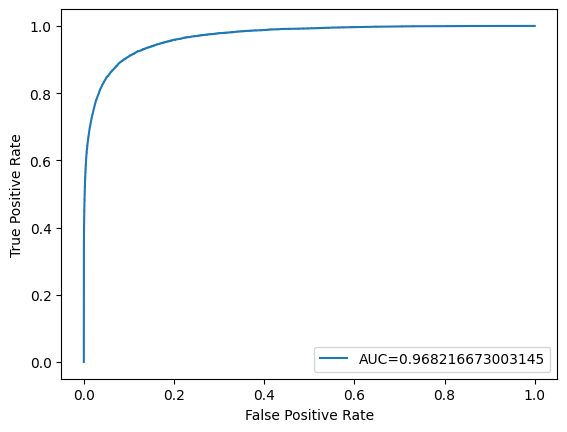

In [42]:
log_predict_proba1 = log_predict_proba[:,1]
fpr, tpr, thresholds = metrics.roc_curve(remaining['toxic'], log_predict_proba1)
auc = metrics.roc_auc_score(remaining['toxic'], log_predict_proba1)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [43]:
f1 = 0.0
threshold = 0.1
for thresh in range(1, 9):
  predict_cv_proba = (log_predict_proba1 >= thresh/10).astype(bool) 
  #print(i)
#   print(predict_cv.sum())
  #print(y_test.sum())
  print(metrics.f1_score(remaining['toxic'], predict_cv_proba))
  if f1<metrics.f1_score(remaining['toxic'], predict_cv_proba):
      threshold = thresh/10
      f1 = metrics.f1_score(remaining['toxic'], predict_cv_proba)
print(threshold)

0.5622210976675714
0.6711432606126978
0.7231473366442691
0.7519932562958799
0.7669285447063224
0.7727272727272727
0.771540252827678
0.7612869290786358
0.6


In [44]:
predict_log = log.predict(bow_test)
print(predict_log)
print(predict_log.sum())
print(y_test.sum())
print(metrics.f1_score(y_test, predict_log))

[0 0 0 ... 0 0 0]
3750
3237
0.7808787748676114


In [45]:
predict_final = (log.predict_proba(bow_test)[:,1] >= threshold).astype(bool) 
print(predict_final)
print(predict_final.sum())
print(y_test.sum())
print(metrics.f1_score(y_test, predict_final))

[False False False ... False False False]
3427
3237
0.7929171668667467


<div class="alert alert-info"> <b>Комментарий студента:</b> Спасибо! достал вероятности из кросс-валидационной проверки, сделал подбор отсечки оттуда. Получилось выиграть приблизительно 0.01%)

[[0.9642932  0.0357068 ]
 [0.15724436 0.84275564]]


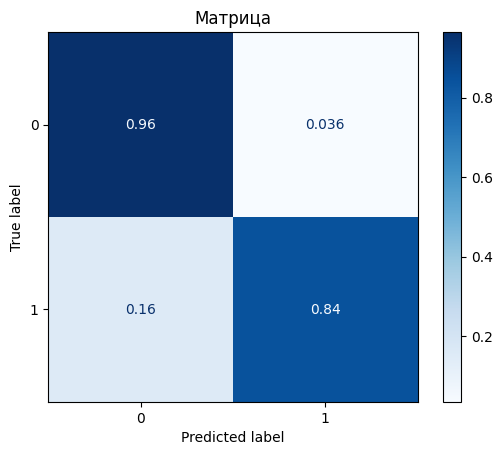

In [46]:

disp = metrics.ConfusionMatrixDisplay.from_estimator(
        log,
        bow_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize='true',
    )
disp.ax_.set_title('Матрица')

print(disp.confusion_matrix)

plt.show()

## Выводы

    * Для классификации комментариев были предоставлены 160 тысяч текстов с проведенной категоризацией.
    * Данные предоставлены в подходящем формате, пропусков и ошибок в них не обнаружено.
    * Для выбора модели использовалась половина данных из-за ограниченности вычислительных ресурсов.
    * Наилучшие результаты показала логистическая регрессия, ее показатель на валидационной выборке составил болеее 76 %. Дальнейшая работа велась с этой моделью.
    * На основании ROC-кривой было принято решение увеличить отсеку до 80% вероятности. Это прибавило к метрике f1 еще около 3%.
    
    Вывод:
    Для анализа текстов из библиотеки sklearn больше всего подходит модель LogisticRegression. 
    
    комментарии классифицированы.
    

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 

Для работы с текстами используют и другие подходы. Например, сейчас активно используются RNN (LSTM) и трансформеры (BERT и другие с улицы Сезам, например, ELMO). НО! Они не являются панацеей, не всегда они нужны, так как и TF-IDF или Word2Vec + модели из классического ML тоже могут справляться. \
BERT тяжелый, существует много его вариаций для разных задач, есть готовые модели, есть надстройки над библиотекой transformers. Если, обучать BERT на GPU (можно в Google Colab или Kaggle), то должно быть побыстрее.\
https://huggingface.co/transformers/model_doc/bert.html \
https://t.me/renat_alimbekov \
https://colah.github.io/posts/2015-08-Understanding-LSTMs/ - Про LSTM \
https://web.stanford.edu/~jurafsky/slp3/10.pdf - про энкодер-декодер модели, этеншены\
https://pytorch.org/tutorials/beginner/transformer_tutorial.html - официальный гайд
по трансформеру от создателей pytorch\
https://transformer.huggingface.co/ - поболтать с трансформером \
Библиотеки: allennlp, fairseq, transformers, tensorflow-text — множество реализованных
методов для трансформеров методов NLP \
Word2Vec https://radimrehurek.com/gensim/models/word2vec.html 
    
</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>
<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>Александр, получился хороший проект! 
    
Если есть  если есть какие либо вопросы я с удовольствием на них отвечу:) <br> Исправь, пожалуйста, замечания и жду проект на следующую проверку:) </div>


<div style="border:solid green 2px; padding: 20px">
<b>Привет, Александр!</b>

Меня зовут Александр Пономаренко, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать data science. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**. Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самой найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но настаивать на их отработке не буду.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#загрузка-данных,-просмотр" data-toc-modified-id="загрузка-данных,-просмотр-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>загрузка данных, просмотр</a></span></li><li><span><a href="#подготовка-данных-к-обучению" data-toc-modified-id="подготовка-данных-к-обучению-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>подготовка данных к обучению</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#DecissionTreeClassifier" data-toc-modified-id="DecissionTreeClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>DecissionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>CatBoostClassifier</a></span></li><li><span><a href="#Таким-образом,-лучшие-показатели-f1-дала-модель-LogisticRegresion.-Попробуем-их-улучшить" data-toc-modified-id="Таким-образом,-лучшие-показатели-f1-дала-модель-LogisticRegresion.-Попробуем-их-улучшить-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Таким образом, лучшие показатели f1 дала модель LogisticRegresion. Попробуем их улучшить</a></span></li><li><span><a href="#Дообучим-выбранную-модель-на-всех-оставшихся-данных-перед-финальной-и-проведем-тест-на-тестовой-выборке." data-toc-modified-id="Дообучим-выбранную-модель-на-всех-оставшихся-данных-перед-финальной-и-проведем-тест-на-тестовой-выборке.-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Дообучим выбранную модель на всех оставшихся данных перед финальной и проведем тест на тестовой выборке.</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

<div class="alert alert-success">
<b>Комментарий ревьюера V3✔️:</b> Удачи в следующих проектах!!!:)</div>